In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/analysis'

In [4]:
df_train = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/train.csv', sep='\t', index_col=0)
df_val = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/val.csv', sep='\t', index_col=0)
df_test = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/test.csv', sep='\t', index_col=0)

In [5]:
df_train.head()

,text,target
0,come back hoe <user> <url>,1
1,rt <user> bouta take a shower just to fuck yo ...,1
2,stiff armed his hoe ass lmao,1
3,<user> ugly goldigging cunt u probably have an...,1
4,fuck bitches get money aye,1


### Number of tokens (for BERT tokenization)

In [6]:
df_train['num_tokens'] = df_train['text'].apply(lambda x: len(x.split()))
df_val['num_tokens'] = df_val['text'].apply(lambda x: len(x.split()))
df_test['num_tokens'] = df_test['text'].apply(lambda x: len(x.split()))

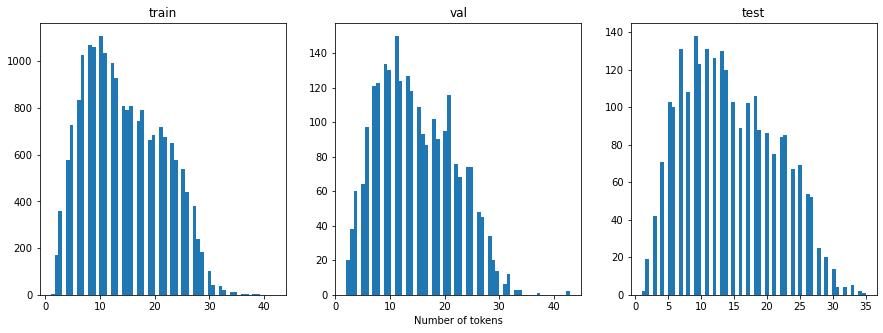

In [7]:
# column subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].hist(df_train['num_tokens'], bins=60)
axes[0].set_title('train')
axes[1].hist(df_val['num_tokens'], bins=60)
axes[1].set_title('val')
axes[1].set_xlabel('Number of tokens')
axes[2].hist(df_test['num_tokens'], bins=60)
axes[2].set_title('test');

In [9]:
df_train['num_tokens'].describe()

count    17348.000000
mean         9.956249
std          4.605481
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         47.000000
Name: num_tokens, dtype: float64

In [27]:
print(df_train['target'].value_counts(normalize=True))
print(df_val['target'].value_counts(normalize=True))
print(df_test['target'].value_counts(normalize=True))

1    0.83243
0    0.16757
Name: target, dtype: float64
1    0.824859
0    0.175141
Name: target, dtype: float64
1    0.837278
0    0.162722
Name: target, dtype: float64
